# Exploratory Data Analysis Workshop

June 24, 2020  

### Welcome/Purpose of Workshop

- improve skills
- join our project team

### About Data Circles -- https://datacircles.org

Presenters Niwako and Erin are members of the Data Circles Project Circle. The Projects Circle is facilitating the Traffic Collision Analysis project.    

## 1. Introduction to the project

Traffic collisions continue to be a serious problem. According to the [Washington State Dept. of Transportation (WSDOT)](https://www.wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf), in 2015, Washington had:  

• 5,576,586 Licensed Drivers  
• 6,252,554 Registered Vehicles  
• 59.7 billion Vehicle Miles traveled  
• 416,699 Speeding citations filed with Washington State Courts  
• 33,697 Cell phone and texting citations filed with Washington State Courts  
• 26,363 DUI cases filed with Washington State Courts  
• 117,053 Total collisions  
• Fridays had the most collisions 
• Rush hour had the most collisions, with the highest number during 5:00 p.m. - 5:59 p.m.  
• December had the most crashes (on average, 401 per day)  
• Driver inattention or distraction was the most frequent contributing factor  

So, by analyzing crash data we hope to identify the most dangerous sections of road in Seattle and suggest improvements.  

If you are interested in joining the project team, please signup for the project kickoff on [meetup.com](https://www.meetup.com/Seattle-WiDS-Meetup/events/ncnksrybckblb/).  

## 2. Purpose of exploratory data analysis

Data exploration is the first step in the data analysis process, and involves looking for patterns, characteristics, or points of interest in a large set of unstructured data. Summarizing the size, accuracy and initial patterns in the data provides insight into potential trends and identifies areas that require further analysis to refine the data.  

Data exploration typically uses both manual data analysis and automated tools that extract data into initial reports that include data visualizations and charts. Analysis typically includes: variable identification, data cleaning/reformatting, univariate analysis and bi-variate analysis. The end result provides a more useful view of the data to guide further analysis.  

## 3. Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore') 

from datetime import datetime
from IPython.display import display, Markdown

In [2]:
# Display all output within each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 4. Read the data into a dataframe

It's always a good idea to keep a copy of the original data. So, we suggest saving the original collision data in a CSV file and a second CSV file with the manipulated data.  

In [3]:
url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
# Niwako renamed the dataframe to rdf (raw df). I wanted df to be a copy of the original dataframe
# so that each time we make changes to the dataframe and needed to rerun cells, we don't have to
# run this cell.
rdf = pd.read_csv(url, parse_dates=['INCDTTM'])
display(rdf.head())

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.317685,47.715823,1,24500,24500,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004/03/03 00:00:00+00,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,0,0,N
1,-122.273540,47.523310,2,140000,140000,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2012/04/07 00:00:00+00,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,0,0,N
2,-122.300605,47.666267,3,39000,39000,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,NaN,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2005/06/15 00:00:00+00,2005-06-15 19:12:00,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,0,Clear,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,0,0,N
3,-122.326436,47.612451,4,1337,1337,3563041,Matched,Block,NaN,MINOR AVE BETWEEN UNIVERSITY ST AND UNION ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013/03/27 00:00:00+00,2013-03-27 23:19:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N
4,-122.334437,47.571514,5,71500,71500,07122054,Unmatched,Block,NaN,WEST SEATTLE BR EB BETWEEN W SEA BR EB 4 AV OF...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2007/05/02 00:00:00+00,2007-05-02 00:00:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,7122054.0,NaN,NaN,NaN,0,0,N


In [4]:
# if you want to save the data locally in a CSV file, then run this cell

# Niwako renamed the df to rdf for the same reason as above
now = datetime.now()
rdf.to_csv("collision_data_{}{}{}.csv".format(now.month, now.day, now.year),
           encoding="utf-8", index=False)

## 5. Look at the overall picture of the dataframe

In [5]:
df = rdf.copy()

In [6]:
df.shape

(219675, 40)

In [7]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### About the columns

OBJECTID - ESRI unique identifier  
SHAPE - ESRI geometry field  
INCKEY - a unique key for the incident, type Long  
COLDETKEY - a secondary key for the incident, type Long  
ADDRTYPE - text, 12 VARCHAR, Collision address type:  
$\,\,$• Alley  
$\,\,$• Block  
$\,\,$• Intersection   
INTKEY - a key that corresponds to the intersection associated with a collision, type Double  
SEVERITYCODE - a code that corresponds to the severity of the collision:  
$\,\,$• 3 — fatality  
$\,\,$• 2b — serious injury  
$\,\,$• 2 — injury  
$\,\,$• 1 — prop damage  
$\,\,$• 0 — unknown  
INCDATE - incident date   
INCDTTM - date and time of the incident, type Text, 30 VARCHAR  
JUNCTIONTYPE - category of the junction where the collision took place  
SDOT_COLCODE - the SDOT collision code    
SDOT_COLDESC - a description of the collision corresponding to the collision code  
INATTENTIONIND - whether or not collision was due to inattention. (Y/N)  
PEDROWNOTGRNT - whether or not the pedestrian right of way was not granted. (Y/N)  
ST_COLCODE - code provided by the state that describes the collision, for example: 
$\,\,$0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$3 - Vehicle Backing Hits Pedestrian  
$\,\,$4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$10 - Entering At Angle   
$\,\,$11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$...  
ST_COLDESC - a description that corresponds to the state’s coding designation    
SEGLANEKEY - a key for the lane segment in which the collision occurred  
CROSSWALKKEY - a key for the crosswalk at which the collision occurred  

In [8]:
df.dtypes

X                         float64
Y                         float64
OBJECTID                    int64
INCKEY                      int64
COLDETKEY                   int64
REPORTNO                   object
STATUS                     object
ADDRTYPE                   object
INTKEY                    float64
LOCATION                   object
EXCEPTRSNCODE              object
EXCEPTRSNDESC              object
SEVERITYCODE               object
SEVERITYDESC               object
COLLISIONTYPE              object
PERSONCOUNT                 int64
PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
INJURIES                    int64
SERIOUSINJURIES             int64
FATALITIES                  int64
INCDATE                    object
INCDTTM            datetime64[ns]
JUNCTIONTYPE               object
SDOT_COLCODE              float64
SDOT_COLDESC               object
INATTENTIONIND             object
UNDERINFL                  object
WEATHER       

## 6. Understand the dataframe in relation to the questions at hand

## a. Questions/goals:

- To identify locations that are prone to collisions
- To identify predictors of accidents (e.g., physical characteristics of the location, road condition, DUI, weather)
- To examine increase or decrease in number of accidents over time
- To identify predictors of increase or decrease in the number of accidents
- Recommend improvements on dangerous locations


## b. Which columns are related to the outcome of the incident?

- PERSONCOUNT
- PEDCOUNT
- PEDCYLCOUNT
- VEHCOUNT
- INJURIES
- SERIOUSINJURIES
- FATALITIES

## c. Which columns might serve as predictors of the outcome of the incident?

### External (i.e., not dependent on the characteristics of the collision site) factors
- LIGHTCOND (8 categories)
Dark
Dawn
Daylight
Dusk
Weather (10 categories)
Code categories in a way that larger values indicate harsher conditions

### People’s factors
- INATTENTIONIND (too many missing values)
- UNDERINFL (191,173 = 88% have data)
- PEDROWNOTGRNT(Whether pedestrian had the right of way or not; too many missing values)
- SPEEDING (too many missing values)

### Characteristics of the site
- ADDRTYPE (3 categories)
- LOCATION (many categories)
- JUNCTIONTYPE (7 categories)
- ROADCOND (9 categories; linked to weather)
- SEGLANEKEY (A key for the lane segment in which the collision occurred) ← Not a categorical variable. No missing values.
- CROSSWALKKEY (A key for the crosswalk at which the collision occurred) ← Not a categorical variable. No missing values.


## 7. Cleaning at the dataframe level

It can be helpful to evaluate the dataframe as a whole and do dataframe level cleaning and formatting before drilling down into the individual variables. This includes tasks like renaming columns, removing duplicate rows, changing column datatypes, or dropping any clearly unnecessary columns (especially if memory is an issue).  

Depending on the complexity of your dataset and how familiar you are with the the domain knowledge, some of these tasks will need to be completed after you work with the individual variables, _i.e._ at the column level.  

This might also be a good point to merge multiple dataframes if you're working with multiple datasets.  

### a. Consider dropping unnecessary columns

It is a bit risky to drop columns at this point, but if there are columns that are clearly unhelpful or missing a huge amount of data, then dropping those columns is reasonable. 

In [9]:
# example - column objectid is essentially an index column, so you could drop it,
# but this might make things a bit difficult later if you want to merge on objectid
df.drop(columns=["OBJECTID"], inplace=False).head(3)

,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.317685,47.715823,24500,24500,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004/03/03 00:00:00+00,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,0,0,N
1,-122.273540,47.523310,140000,140000,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2012/04/07 00:00:00+00,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,0,0,N
2,-122.300605,47.666267,39000,39000,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,NaN,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2005/06/15 00:00:00+00,2005-06-15 19:12:00,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,0,Clear,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,0,0,N


In [10]:
# or make objectid the df index
df.set_index("OBJECTID", inplace=False).head(3)

,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-122.317685,47.715823,24500,24500,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004/03/03 00:00:00+00,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,0,0,N
2,-122.273540,47.523310,140000,140000,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2012/04/07 00:00:00+00,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,0,0,N
3,-122.300605,47.666267,39000,39000,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,NaN,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2005/06/15 00:00:00+00,2005-06-15 19:12:00,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,0,Clear,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,0,0,N


In [11]:
# consider how many missing values there are in each column

col_na = round(100*(df.isna().sum()/len(df)), 2)
col_nunique = df.nunique()
display(pd.DataFrame({"percent_na": col_na,
                      "total_unique": col_nunique}).sort_values(by=["percent_na"],
                                                                ascending=False).head(20))

,percent_na,total_unique
PEDROWNOTGRNT,97.66,1
SPEEDING,95.54,1
EXCEPTRSNDESC,94.66,1
INATTENTIONIND,86.26,1
INTKEY,67.57,7886
EXCEPTRSNCODE,54.81,2
SDOTCOLNUM,42.09,127186
LIGHTCOND,12.20,9
WEATHER,12.16,11
ROADCOND,12.12,9


### b. Consider dropping duplicate or unnecessary rows 

This section includes two examples. The first example shows a way to look at combinations of variables to determine if there are duplicates. The second considers dropping rows based on insufficient data, i.e. it might make sense to drop all the 2003 data because there are very few data values from 2003 and that may skew the distribution.  

In [12]:
dup_col_lst = []

for col in df.columns:
    if df[col].nunique() == df.shape[0]:
        print("column {} has no duplicate rows".format(col))
    else:
        dup_col_lst.append(col)
        
print("\n {} columns have duplicate values:\n{}".format(len(dup_col_lst), dup_col_lst))

column OBJECTID has no duplicate rows
column INCKEY has no duplicate rows
column COLDETKEY has no duplicate rows

 37 columns have duplicate values:
['X', 'Y', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [13]:
# example to drop duplicate rows (although no duplicate rows in this example)

df.drop_duplicates(subset=["OBJECTID", "INCDATE"], keep="first", inplace=True)

In [14]:
# looking at incidents over time to see the annual distribution of the data

df["INCDATE"] = df["INCDATE"].astype("datetime64")
df["YEAR"] = df["INCDATE"].map(lambda x: int(x.strftime('%Y')))
# df['year'] = pd.DatetimeIndex(df.INCDTTM).year
df["MONTH"] = df["INCDATE"].map(lambda x: x.strftime('%m'))
round(100*(df[["YEAR", "OBJECTID"]].groupby(by=["YEAR"]).count()/len(df)), 3)

,OBJECTID
YEAR,
2003,0.000
2004,7.036
2005,7.291
2006,7.190
2007,6.866
2008,6.436
2009,6.043
2010,5.443
2011,5.652


In [15]:
df = df[df["YEAR"] > 2003]

### c. Consider renaming columns

If you want to use new naming conventions for variables, it is better to make the change earlier. For example, it often makes sense to change all the column names to lowercase or add underscores between words. 

In [16]:
# example to make all column names lowercase

df.columns = map(str.lower, df.columns)
df.head(2)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month
0,-122.317685,47.715823,1,24500,24500,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-03-03,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,0,0,N,2004,03
1,-122.273540,47.523310,2,140000,140000,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2012-04-07,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,0,0,N,2012,04


### d. Consider changing variable data types

Think about how you plan to use the variable before you change its data type. Pandas data types include: "bool", "float64", "int", "object", "category", and etc.  

In Pandas, `categorical variables` require less memory, so (if appropriate) it can be very useful to change numeric or string (aka Object) variables to categorical variables. However, there are additional considerations. For example, a column with null (NaN) values cannot be converted into a categorical variable. Also, categorical variables cannot be summed like numerical variables, so running univariate statistics on categorical variables requires an additional step.   

In [17]:
# look at how much memory each column variable requires
df.memory_usage()

Index              1757392
x                  1757392
y                  1757392
objectid           1757392
inckey             1757392
coldetkey          1757392
reportno           1757392
status             1757392
addrtype           1757392
intkey             1757392
location           1757392
exceptrsncode      1757392
exceptrsndesc      1757392
severitycode       1757392
severitydesc       1757392
collisiontype      1757392
personcount        1757392
pedcount           1757392
pedcylcount        1757392
vehcount           1757392
injuries           1757392
seriousinjuries    1757392
fatalities         1757392
incdate            1757392
incdttm            1757392
junctiontype       1757392
sdot_colcode       1757392
sdot_coldesc       1757392
inattentionind     1757392
underinfl          1757392
weather            1757392
roadcond           1757392
lightcond          1757392
pedrownotgrnt      1757392
sdotcolnum         1757392
speeding           1757392
st_colcode         1757392
s

In [18]:
# example - way to filter the original variable data types

df.select_dtypes(exclude=["int"]).head()

,x,y,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,hitparkedcar,month
0,-122.317685,47.715823,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2004-03-03,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,N,03
1,-122.273540,47.523310,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2012-04-07,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,N,04
2,-122.300605,47.666267,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,NaN,NaN,2,Injury Collision,Cycles,2005-06-15,2005-06-15 19:12:00,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,0,Clear,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,N,06
3,-122.326436,47.612451,3563041,Matched,Block,NaN,MINOR AVE BETWEEN UNIVERSITY ST AND UNION ST,,NaN,1,Property Damage Only Collision,Parked Car,2013-03-27,2013-03-27 23:19:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,N,03
4,-122.334437,47.571514,07122054,Unmatched,Block,NaN,WEST SEATTLE BR EB BETWEEN W SEA BR EB 4 AV OF...,NaN,NaN,0,Unknown,NaN,2007-05-02,2007-05-02 00:00:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,7122054.0,NaN,NaN,NaN,N,05


In [19]:
# example - to check to see if the column is really a float or should be an int
pd.Series(df["sdotcolnum"].unique()).sort_values(ascending=True)[0:30]

90457    1007024.0
2433     3021048.0
151      3137016.0
658      3239035.0
8156     4001001.0
9421     4001002.0
8064     4001003.0
1471     4001004.0
1494     4001005.0
10672    4001006.0
14157    4001007.0
9443     4001008.0
10780    4001009.0
5614     4001010.0
10529    4001011.0
5501     4001012.0
15132    4001013.0
4753     4001014.0
10364    4001015.0
7903     4001016.0
15916    4001017.0
3625     4001018.0
9006     4001019.0
3077     4001020.0
1305     4001021.0
16223    4001022.0
9010     4001023.0
7113     4001024.0
15867    4001025.0
9175     4001026.0
dtype: float64

In [20]:
# Clean up column data types

df_ = df.copy()

for col in df_.columns:
    if col.lower() in ["status", "addrtype", "severitycode"]:
        df_.fillna({col: "none"}, inplace=True)
        df_[col] = pd.Series([str(word).lower() for word in df[col]])
        df_[col] = df[col].astype("category")
    elif col.lower() in ["sdot_colcode", "sdotcolnum"]:
        df_[col] = df[col].fillna(0).astype(int)
    elif col.lower() in ["x", "y"]:
        df_[col] = df[col].astype("float")
    elif col.lower() in ["incdttm"]:
        df_[col] = pd.to_datetime(arg=df[col])
    else:
        continue
        
df_.dtypes

x                         float64
y                         float64
objectid                    int64
inckey                      int64
coldetkey                   int64
reportno                   object
status                   category
addrtype                 category
intkey                    float64
location                   object
exceptrsncode              object
exceptrsndesc              object
severitycode             category
severitydesc               object
collisiontype              object
personcount                 int64
pedcount                    int64
pedcylcount                 int64
vehcount                    int64
injuries                    int64
seriousinjuries             int64
fatalities                  int64
incdate            datetime64[ns]
incdttm            datetime64[ns]
junctiontype               object
sdot_colcode                int64
sdot_coldesc               object
inattentionind             object
underinfl                  object
weather       

## 8. Understand individual columns

## 8.1 Numeric columns

## a. Handling missing values or null values

In [21]:
df.isnull().sum(axis = 0)

x                    7449
y                    7449
objectid                0
inckey                  0
coldetkey               0
reportno                0
status                  0
addrtype             3700
intkey             148426
location             4565
exceptrsncode      120402
exceptrsndesc      207950
severitycode            1
severitydesc            0
collisiontype       26523
personcount             0
pedcount                0
pedcylcount             0
vehcount                0
injuries                0
seriousinjuries         0
fatalities              0
incdate                 0
incdttm                 0
junctiontype        11922
sdot_colcode            0
sdot_coldesc            0
inattentionind     189492
underinfl           26503
weather             26705
roadcond            26631
lightcond           26795
pedrownotgrnt      214524
sdotcolnum          92470
speeding           209879
st_colcode           9412
st_coldesc          26523
seglanekey              0
crosswalkkey

To handle missing values, we can either 1) drop the row that has the missing value or 2) replace them with the mean or median of the column. 

### 1) Drop rows that contain missing values

In [22]:
#df = df.dropna()

If we drop rows with any missing value, however, we could lose a big portion of the dataframe.

In [23]:
df.shape

(219674, 42)

It seems that none of the rows in this dataset has complete data. So we would end up with now row if we dropped any row with missing values. We could take a closer look and decide to drop rows depending on which columns they are missing values in (e.g., even if `X` and `Y` are missing, as long as the `LOCATION` column is not missing, we still know where the accident happened, so it's okay to keep a row that are missing `X` and `Y`).

### 2) Replace missing values with the mean or median of the column

In general, columns whose data types are either int64 or float64 are considered numeric columns. As you can see, many of the numeric columns in this dataframe have missing values. But it's important to think about whether or not it makes sense to handle missing values for all of these columns. For example, given that `X` and `Y` are coordinates on the map, would it make sense to replace the missing values with the mean of coordinates? Probably not.



**Note: Groupby the dataframe and create a numeric columns (like Erin's suggestion) with some missing values to replace with the mean...** The dataset as is doesn't have numeric columns that contain missing values. 

## b. Handling outliers

First check for outliers numerically and visually for each column. For this step, we are going to focus on the numeric columns that are also outcome columns.

### 1) Check for outliers numerically

In [24]:
numeric_columns = [
    'personcount',
    'pedcount',
    'pedcylcount',
    'vehcount',
    'injuries',
    'seriousinjuries',
    'fatalities']

In [25]:
df[numeric_columns].describe()

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000
mean,2.226636,0.038011,0.027240,1.726613,0.373617,0.015118,0.001684
std,1.471992,0.201538,0.164203,0.832012,0.732391,0.157955,0.044621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
max,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12c127490>,
 'caps': [<matplotlib.lines.Line2D at 0x12c1379d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c127a10>],
 'medians': [<matplotlib.lines.Line2D at 0x12c130ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c130990>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x12f620b90>,
 'caps': [<matplotlib.lines.Line2D at 0x12f60cd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f60c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12e12f810>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e12f2d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1243ae250>,
 'caps': [<matplotlib.lines.Line2D at 0x1243a8890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1243ae750>],
 'medians': [<matplotlib.lines.Line2D at 0x1243a8d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1243d92d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x12ea4bbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1238dd750>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ea4b690>],
 'medians': [<matplotlib.lines.Line2D at 0x12ea24890>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ea24dd0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x12a50a5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12a5277d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a50a090>],
 'medians': [<matplotlib.lines.Line2D at 0x12a511f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a511a10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x121beaa10>,
 'caps': [<matplotlib.lines.Line2D at 0x121bf34d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121bea2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x121bf3f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x121bfa510>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x121e94250>,
 'caps': [<matplotlib.lines.Line2D at 0x121e94d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x121e8ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x121e83cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x121e9a8d0>],
 'means': []}

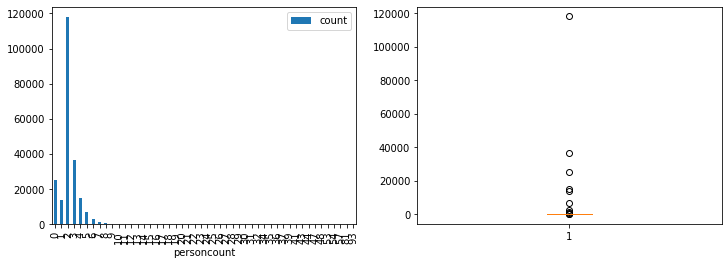

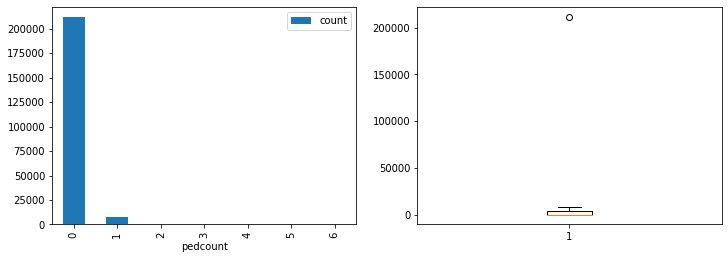

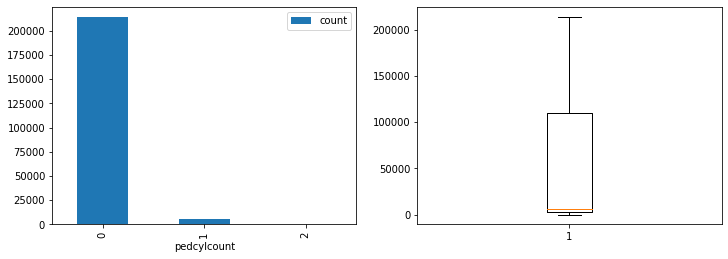

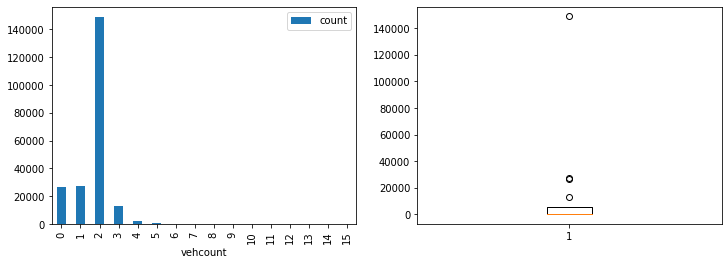

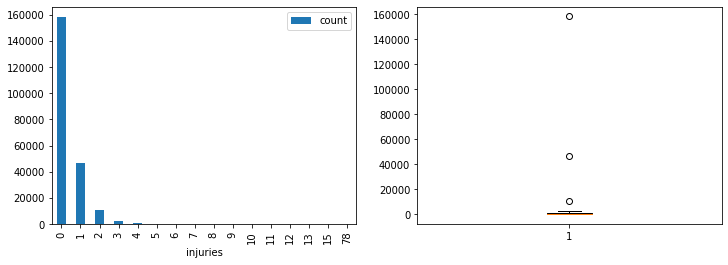

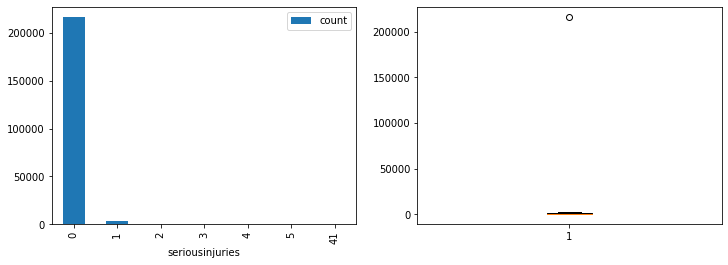

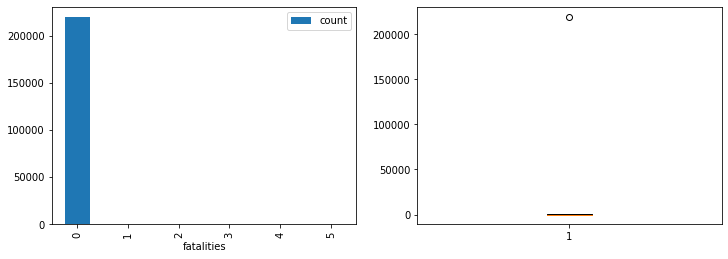

In [26]:
for column in numeric_columns:
    fig = plt.figure(figsize=(12, 4))
    left = fig.add_subplot(1, 2, 1)
    right = fig.add_subplot(1, 2, 2)

    tempdf = df.groupby(df[column]).size().to_frame('count')
    tempdf.plot.bar(ax=left)
    right.boxplot(tempdf['count'])
    fig.show()

### Replace outliers with the median

Write a function to calculate the interquartile range, lower bound and upper bound to identify outliers.

In [27]:
def interquartile_range(array):
    # Calculate the 1st and 3rd quartiles
    quartile_1 = np.quantile(array, 0.25)
    quartile_3 = np.quantile(array, 0.75)
    # Calculate the interquartile range
    iqr = quartile_3 - quartile_1
    # Calculate the upper_bound and the lower_bound, which will be used to identify outliers later
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    
    return lower_bound, upper_bound

Write a function to replace outliers with the median of each column.

In [28]:
def replace_outlier(array):
    # Create a copy of the array so the original array is untouched
    array = array.copy()
    # Calculate the upper and lower bounds using the function I wrote above
    bounds = interquartile_range(array)
    lower_bound, upper_bound = interquartile_range(array)
    # Now replace the outliers with the median
    array[(array < lower_bound) | (array >= upper_bound)] = array.median()
    return array

Call the replace_outlier function on all the numeric columns.

In [29]:
df[f'r_personcount'] = replace_outlier(df['personcount'])
df[f'r_injuries'] = replace_outlier(df['injuries'])

df.describe()

,x,y,objectid,inckey,coldetkey,intkey,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,sdot_colcode,sdotcolnum,seglanekey,crosswalkkey,year,r_personcount,r_injuries
count,212225.000000,212225.000000,219674.000000,219674.000000,219674.000000,71248.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,219674.000000,1.272040e+05,219674.000000,2.196740e+05,219674.000000,219674.000000,219674.000000
mean,-122.330751,47.620251,109838.499486,143241.657524,143459.964074,37588.441500,2.226636,0.038011,0.027240,1.726613,0.373617,0.015118,0.001684,13.378320,7.971099e+06,262.849277,9.636143e+03,2011.250139,2.238340,0.309736
std,0.030040,0.055986,63414.566745,87905.051901,88266.389313,51843.821945,1.471992,0.201538,0.164203,0.832012,0.732391,0.157955,0.044621,7.303929,2.611500e+06,3257.744144,7.167844e+04,4.721664,0.665525,0.557094
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00,2004.000000,1.000000,0.000000
25%,-122.349280,47.577431,54920.250000,71206.250000,71206.250000,28651.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007030e+06,0.000000,0.000000e+00,2007.000000,2.000000,0.000000
50%,-122.330348,47.616135,109838.500000,126325.500000,126325.500000,29972.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033012e+06,0.000000,0.000000e+00,2011.000000,2.000000,0.000000
75%,-122.311998,47.664216,164756.750000,207363.750000,207563.750000,33969.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00,2015.000000,2.000000,1.000000
max,-122.238949,47.734142,219675.000000,331604.000000,333104.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06,2020.000000,4.000000,2.000000


In [30]:
df['vehcount'].value_counts()

2     148903
1      27532
0      26746
3      13227
4       2478
5        547
6        152
7         51
8         17
9          9
11         6
10         2
15         1
14         1
13         1
12         1
Name: vehcount, dtype: int64

Note: It's important to think if it makes sense to replace values with the median if they look like outliers. In the case of 'VEHCOUNT', it might make sense to keep those high numbers.    

Note: I didn't replace outliers with the median for r_PEDCOUNT, r_PEDCYLCOUNT, r_SERIOUSINJURIES, or r_FATALITIES because hese columns would have no range afterwards.

## d. General trend in the overall number of accidents (line graph)

In [35]:
yeardf = df.groupby('year').year.size().to_frame('count').reset_index()
yeardf.head(20)

,year,count
0,2004,15457
1,2005,16016
2,2006,15794
3,2007,15082
4,2008,14139
5,2009,13275
6,2010,11958
7,2011,12416
8,2012,12732
9,2013,12757


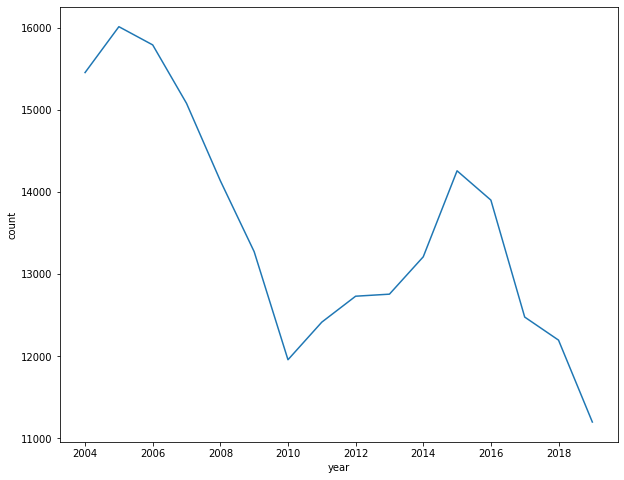

In [36]:
yeardf = yeardf[(yeardf['year'] < 2020)]# Excluding 2020 because the data is incomplete 
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x="year", y="count", data=yeardf)

## e. Trend for the top 5 locations with highest number of accidents (line graphs)

# Which locations have had high numbers of incidents?

In [37]:
locdf = df.groupby('location').size().to_frame('count').reset_index()
locdf.sort_values('count', ascending=False, inplace=True)
locdf = locdf.head(7)

In [38]:
locdf

,location,count
11283,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,298
17565,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,295
11284,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,291
11116,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280
9581,6TH AVE AND JAMES ST,271
11120,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,268
10814,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,256


# How has the number of incidents changed over time for each location (7 locations with highest numbers of collisions)

In [41]:
locations = list(locdf['location'])
locations

['BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 '6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP']

In [42]:
locyrdf = df[df['location'].isin(locations)]
locyrdf.head()

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month,r_personcount,r_injuries
17,-122.344997,47.725036,18,67300,67300,2829236,Matched,Block,NaN,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,NaN,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2007-07-20,2007-07-20 17:28:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Daylight,NaN,7201043.0,NaN,14,From same direction - both going straight - on...,0,0,N,2007,07,2,1
34,NaN,NaN,35,28100,28100,1778147,Matched,Block,NaN,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-08-12,2004-08-12 17:30:00,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,4225009.0,NaN,12,From same direction - both going straight - on...,0,0,N,2004,08,2,0
85,-122.344997,47.725036,86,25200,25200,1793826,Matched,Block,NaN,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-07-27,2004-07-27 16:51:00,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Clear,Dry,Daylight,NaN,4209036.0,NaN,12,From same direction - both going straight - on...,0,0,N,2004,07,2,0
279,-122.344896,47.717173,280,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2013-03-14,2013-03-14 17:30:00,Driveway Junction,18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N,2013,03,2,1
409,NaN,NaN,410,49400,49400,2623108,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,NaN,NaN,1,Property Damage Only Collision,Rear Ended,3,0,0,2,0,0,0,2006-10-23,2006-10-23 18:33:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Dry,Dark - Street Lights On,NaN,6296024.0,NaN,14,From same direction - both going straight - on...,0,0,N,2006,10,3,0


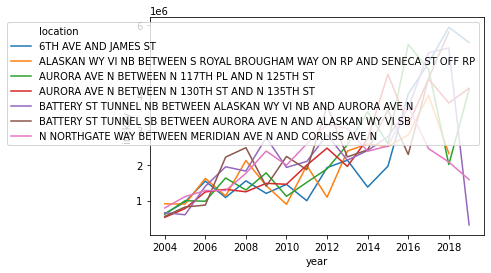

In [45]:
total_location_year_data = locyrdf.groupby(['location', 'year'])['inckey'].sum().reset_index()
total_location_year_data = total_location_year_data[(total_location_year_data['year'] < 2020)]
sns.lineplot(x="year", y="inckey", hue="location", data=total_location_year_data)

# Which locations have the highest numbers of fatal and serious injuries?

In [46]:
# Re-labeling serverity
df['severitycode'] = df['severitycode'].map({'0': 'Unknown', '1': 'Prop_damage', '2': 'Injury', '2b': 'Serious_injury', '3': 'Fatality'})

In [47]:
df.groupby(['severitycode']).size().to_frame('count')

,count
severitycode,
Fatality,347
Injury,58228
Prop_damage,136562
Serious_injury,3062
Unknown,21474


In [49]:
severity = ['Fatality', 'Serious_injury', 'Injury']
sevdf = df[(df['severitycode'].isin(severity))]
sevcdf = sevdf.groupby('location').size().to_frame('count').reset_index()
sevcdf.sort_values('count', ascending=False, inplace=True)
most_sev = sevcdf.head(7)
most_sev

,location,count
5656,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,126
4721,6TH AVE AND JAMES ST,112
10427,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,97
9306,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,96
5660,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,95
5789,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,93
12580,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,82


In [50]:
mostsevlocations = list(most_sev['location'])
mostsevlocations

['AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 '6TH AVE AND JAMES ST',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP']

Note: Locations that have the highest numbers of incidents and locations that have more severe incidetns don't overlap a lot

In [51]:
sevcdf.shape

(12780, 2)

In [53]:
sevcdf['count'].sum()

61356

Note: sevcdf contains 12,780 rows (=locations) but 61,356 incidents. 

## 8.2 Categorial columns

## a. Look at frequencies

### External factors

In [54]:
df.groupby('lightcond').size().to_frame('count').reset_index()

,lightcond,count
0,Dark - No Street Lights,1564
1,Dark - Street Lights Off,1231
2,Dark - Street Lights On,49663
3,Dark - Unknown Lighting,11
4,Dawn,2565
5,Daylight,118082
6,Dusk,6024
7,Other,239
8,Unknown,13500


In [55]:
df.groupby('weather').size().to_frame('count').reset_index()

,weather,count
0,Blowing Sand/Dirt,56
1,Clear,113365
2,Fog/Smog/Smoke,575
3,Other,843
4,Overcast,28208
5,Partly Cloudy,5
6,Raining,33728
7,Severe Crosswind,26
8,Sleet/Hail/Freezing Rain,115
9,Snowing,917


### People factors

In [57]:
people_factors = ['inattentionind', 'underinfl', 'pedrownotgrnt', 'speeding']
for factor in people_factors:
    display(df.groupby(factor).size().to_frame('count'))

,count
inattentionind,
Y,30182


,count
underinfl,
0,81678
1,4230
N,101867
Y,5396


,count
pedrownotgrnt,
Y,5150


,count
speeding,
Y,9795


### Characteristics of the collision site

In [59]:
site_characteristics = ['addrtype', 'junctiontype', 'roadcond']
for characteristics in site_characteristics:
    display(df.groupby(characteristics).size().to_frame('count').reset_index())

,addrtype,count
0,Alley,865
1,Block,143861
2,Intersection,71248


,junctiontype,count
0,At Intersection (but not related to intersection),2491
1,At Intersection (intersection related),68547
2,Driveway Junction,11467
3,Mid-Block (but intersection related),24339
4,Mid-Block (not related to intersection),100697
5,Ramp Junction,190
6,Unknown,21


,roadcond,count
0,Dry,126995
1,Ice,1228
2,Oil,64
3,Other,135
4,Sand/Mud/Dirt,75
5,Snow/Slush,1012
6,Standing Water,118
7,Unknown,15110
8,Wet,48306


## b. Handling missing categories

## c. Relabeling some of the categories 

## d. Combine some of the categories

Let's try reducing the number of categories by combining some catgories for `LIGHTCOND`

In [60]:
df.groupby('lightcond').size().to_frame('count')

,count
lightcond,
Dark - No Street Lights,1564
Dark - Street Lights Off,1231
Dark - Street Lights On,49663
Dark - Unknown Lighting,11
Dawn,2565
Daylight,118082
Dusk,6024
Other,239
Unknown,13500


In [61]:
df['lightcond'] = df['lightcond'].replace({
   'Dark - No Street Lights': 'Dark',
   'Dark - Street Lights Off': 'Dark',
   'Dark - Street Lights On': 'Dark',
   'Dark - Unknown Lighting': 'Dark'})

In [62]:
df.groupby('lightcond').size().to_frame('count')

,count
lightcond,
Dark,52469
Dawn,2565
Daylight,118082
Dusk,6024
Other,239
Unknown,13500


## e. One-hot encode some of the categories

In [65]:
categories = ['addrtype', 'lightcond']
df[categories] = df[categories].replace({np.NaN: 'Unknown'})
onehot = OneHotEncoder(sparse = False)
onehot.fit(df[categories])
col_names = onehot.get_feature_names(categories)
df[col_names] = pd.DataFrame(onehot.transform(df[categories]))
df

OneHotEncoder(sparse=False)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year,month,r_personcount,r_injuries,addrtype_Alley,addrtype_Block,addrtype_Intersection,addrtype_Unknown,lightcond_Dark,lightcond_Dawn,lightcond_Daylight,lightcond_Dusk,lightcond_Other,lightcond_Unknown
0,-122.317685,47.715823,1,24500,24500,1775997,Matched,Block,NaN,NE 120TH ST BETWEEN ROOSEVELT WAY NE AND 10TH ...,NaN,NaN,Prop_damage,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-03-03,2004-03-03 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Daylight,NaN,4063023.0,NaN,26,From opposite direction - both going straight ...,0,0,N,2004,03,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-122.273540,47.523310,2,140000,140000,3608513,Matched,Block,NaN,S HENDERSON ST BETWEEN 46TH AVE S AND 48TH AVE S,NaN,NaN,Prop_damage,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2012-04-07,2012-04-07 14:31:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,12098023.0,NaN,32,One parked--one moving,0,0,N,2012,04,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-122.300605,47.666267,3,39000,39000,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,NaN,NaN,Injury,Injury Collision,Cycles,2,0,1,1,1,0,0,2005-06-15,2005-06-15 19:12:00,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,0,Clear,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,0,0,N,2005,06,2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-122.326436,47.612451,4,1337,1337,3563041,Matched,Block,NaN,MINOR AVE BETWEEN UNIVERSITY ST AND UNION ST,,NaN,Prop_damage,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2013-03-27,2013-03-27 23:19:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Dark,NaN,NaN,NaN,32,One parked--one moving,0,0,N,2013,03,2,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-122.334437,47.571514,5,71500,71500,07122054,Unmatched,Block,NaN,WEST SEATTLE BR EB BETWEEN W SEA BR EB 4 AV OF...,NaN,NaN,Unknown,Unknown,NaN,0,0,0,0,0,0,0,2007-05-02,2007-05-02 00:00:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,Unknown,NaN,7122054.0,NaN,NaN,NaN,0,0,N,2007,05,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219670,-122.364453,47.625436,219671,316815,318315,3750781,Matched,Block,NaN,6TH AVE W BETWEEN W MERCER PL AND DEAD END 1,,NaN,Prop_damage,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019-03-28,2019-03-28 05:31:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Overcast,Dry,Dark,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,2019,03,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219671,-122.302451,47.661253,219672,314397,315877,E896139,Matched,Block,NaN,NE 45TH ST BETWEEN 21ST AVE NE AND NE 45TH ST RP,,NaN,Prop_damage,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019-02-16,2019-02-16 16:30:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,2019,02,2,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
219672,-122.277154,47.696757,219673,316601,318101,3737296,Matched,Block,NaN,SAND POINT 

## 9. Understand relations between columns

## a. Scatter plots

Is there a correlation between the total number of incidents and number of severe incidents?

In [68]:
# Trying to see these locations' total # of incidents and # of severe incidents by merging two dataframes
sev_num = pd.merge(locdf, sevcdf, left_on = 'location', right_on = 'location')
sev_num.rename(columns = {'count_x': 'Total_incidents', 'count_y': 'Severe_incidents'}, inplace=True)
sev_num.head(10)

,location,Total_incidents,Severe_incidents
0,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,298,81
1,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,295,96
2,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,291,93
3,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280,126
4,6TH AVE AND JAMES ST,271,112
5,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,268,95
6,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,256,68


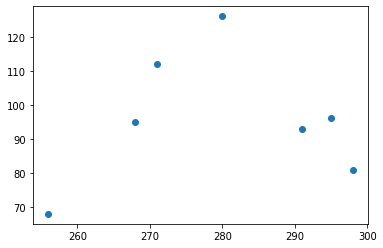

In [69]:
# I have to redo this plot because I selected top 7 locations in sev_num, so it's not much of a scatter plot anymore
plt.scatter(x=sev_num['Total_incidents'], y=sev_num['Severe_incidents'])
plt.show()

## b. Bar graphs

## Incidents by type of location

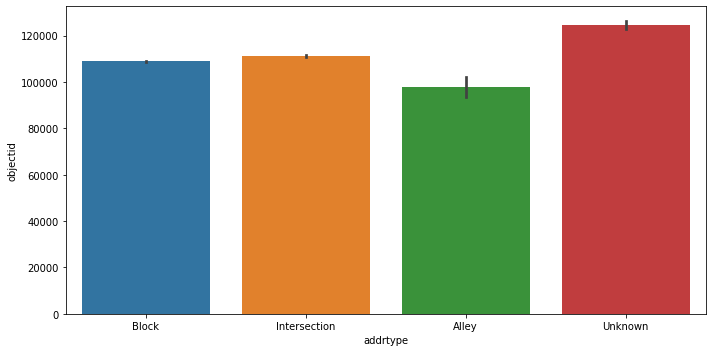

In [70]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data= df, x= 'addrtype', y= 'objectid')

plt.tight_layout()

## Incidents by type of collision

In [75]:
colldf = df.groupby('collisiontype').size().to_frame('count').reset_index()
colldf.head()

,collisiontype,count
0,Angles,35138
1,Cycles,5857
2,Head On,2150
3,Left Turn,13989
4,Other,24302


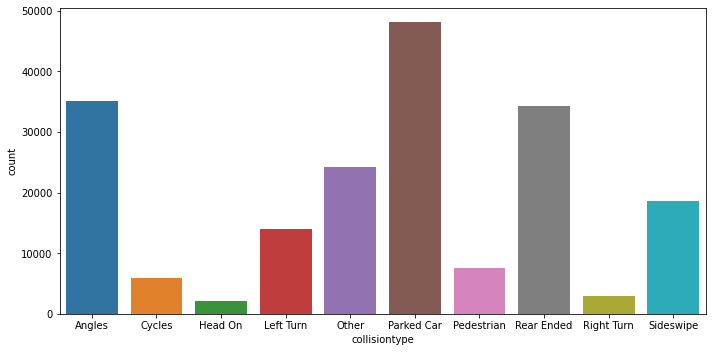

In [76]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data=colldf, x='collisiontype', y='count')

plt.tight_layout()

## Incidents by severity

In [77]:
scdf = df.groupby('severitycode').size().to_frame('count').reset_index()
scdf.head()

,severitycode,count
0,Fatality,347
1,Injury,58228
2,Prop_damage,136562
3,Serious_injury,3062
4,Unknown,21474


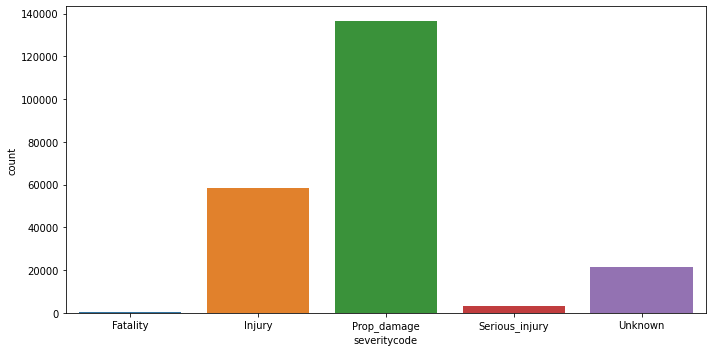

In [78]:
fig = plt.figure(figsize=(10, 5))

chart = sns.barplot(data=scdf, x='severitycode', y='count')

plt.tight_layout()

Note: SEVERITYCODE and SEVERITYDESC have the same information


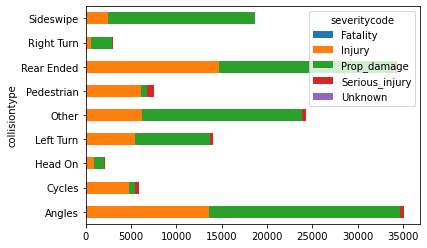

In [79]:
pivdf = df[(df['collisiontype'] != 'Parked Car')]
pivdf.pivot_table(index='collisiontype', columns='severitycode', aggfunc='size').plot.barh(stacked=True)

## Severity by type of collision

In [80]:
type_severity = df.groupby(['collisiontype', 'severitycode'])['inckey'].count().reset_index()
type_severity_pivot = type_severity.pivot(
    columns = 'severitycode',
    index = 'collisiontype',
    values = 'inckey').reset_index()
type_severity_pivot

severitycode,collisiontype,Fatality,Injury,Prop_damage,Serious_injury,Unknown
0,Angles,24.0,13624.0,21051.0,438.0,1.0
1,Cycles,25.0,4744.0,671.0,417.0,NaN
2,Head On,21.0,873.0,1152.0,104.0,NaN
3,Left Turn,16.0,5411.0,8292.0,270.0,NaN
4,Other,92.0,6113.0,17595.0,502.0,NaN
5,Parked Car,7.0,2662.0,45333.0,126.0,NaN
6,Pedestrian,128.0,5936.0,672.0,845.0,NaN
7,Rear Ended,11.0,14673.0,19426.0,224.0,NaN
8,Right Turn,1.0,609.0,2347.0,21.0,NaN
9,Sideswipe,10.0,2506.0,16107.0,71.0,NaN


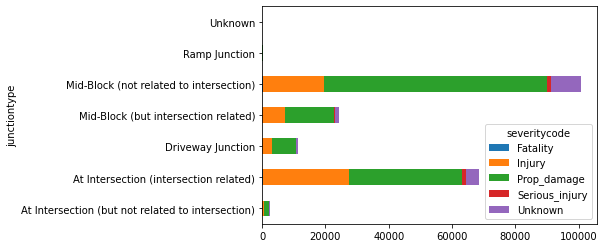

In [81]:
df.pivot_table(index='junctiontype', columns='severitycode', aggfunc='size').plot.barh(stacked=True)

### 8.3. Drop irrelevant/unnecessary columns

We suggest dropping the following columns:  

But, we encourage you to decide for yourself whether you want to remove the suggested column variables or any other columns.  

In [82]:
# consider how much data there is in each column
df_na = df.isna().sum().to_frame("total_null")
df_na["percent_null"] = np.round((df_na["total_null"]/len(df))*100, 0)
df_na["total_unique_values"] = df.nunique()

# the 20 columns with the most null values
display(df_na.sort_values("percent_null", ascending=False).head(20))

,total_null,percent_null,total_unique_values
pedrownotgrnt,214524,98.0,1
speeding,209879,96.0,1
exceptrsndesc,207950,95.0,1
inattentionind,189492,86.0,1
intkey,148426,68.0,7886
exceptrsncode,120402,55.0,2
sdotcolnum,92470,42.0,127185
st_coldesc,26523,12.0,62
roadcond,26631,12.0,9
weather,26705,12.0,11


## 9. Understand relationships between columns


### a. Plots

### b. Correlations between variables

### c. Statistical significance

### d. Simple feature engineering??

Maybe this was already covered... 
